# Constructing an intervention system that leverages supervised learning techniques, 'Classification', to model the factors that predict how likely a student is to pass their high school final exam.

### Load necessary Python libraries and the student data. 

#### The final column from the dataset, 'passed', will be our target variable or ‘y’ (whether the student will be graduated or not). The remaining columns are features (X1.... Xn) of each student.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Read the data

In [2]:
df=pd.read_csv('Desktop\ICTK\Week 11 Q&A\student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Fetching few basic information about the data;

•	The total number of students, n_students.

•	The total number of features for each student, n_features.

•	The number of those students who passed, n_passed.

•	The number of those students who failed, n_failed.

•	The graduation rate of the class, grad_rate, in percent (%).

#### The total number of students

In [3]:
index=df.index
n_students=len(index)
n_students

395

#### The total number of features 

In [4]:
columns=df.columns
n_features=len(columns)
n_features

31

#### Students those have passed the exam as per the data

In [5]:
n_passed=df['passed'].value_counts()['yes']
n_passed

265

#### Students those have failed the exam

In [6]:
n_failed=df['passed'].value_counts()['no']
n_failed

130

#### Graduation percentage

In [7]:
grad_rate=(n_passed/(n_passed+n_failed))*100
grad_rate

67.08860759493672

#### Print the results

In [8]:
print('number of students=',n_students)
print('number of features=',n_features)
print('passing students=',n_passed)
print('failing students=',n_failed)
print('graduation rate=',round(grad_rate,3))

number of students= 395
number of features= 31
passing students= 265
failing students= 130
graduation rate= 67.089


#### Preparing the data for modeling, training, and testing.

Identify features and target columns by separating the data and also to find any features that are non-numeric

In [9]:
df.drop('passed',axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [10]:
df['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [11]:
X=df.drop(['passed'],axis=1)
y=df['passed']

#### Pre-process Feature Columns

There are several non-numeric columns that have to be converted to numeric.

Those are binary like ‘yes or no’, e.g. for internet, can be reasonably converted to ‘1 or 0’ (binary) values. 

Columns that have more than two values, like Mjob and Fjob, are known as categorical variables & the recommended way to handle such columns is to create as many columns as possible (e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign ‘1’ to one of the variables and ‘0’ for all the remaining.

These columns are called dummy variables, and we use the pandas.get_dummies() function to perform this transformation. 

In [12]:
X = pd.get_dummies(X)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


#### Implementation: Training and Testing Data Split

Next step to split the data into training and test sets. 

•	Randomly shuffle and split the data (x, y) into training and testing subsets.

•	Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).

•	Set a random_state for the function(s) you use, if provided.

•	Store the results in X_train, X_test, y_train, and y_test.


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.24)

In [14]:
print("Training feature set size: ", X_train.shape," target set size: ", y_train.shape,"\nTesting feature set size: ", X_test.shape," target set size: ", y_test.shape)

Training feature set size:  (300, 56)  target set size:  (300,) 
Testing feature set size:  (95, 56)  target set size:  (95,)


#### Training and Evaluating Models

Need to choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. 


Since this is a binary classification problem, we can choose:

#### Import the three supervised learning models from sklearn

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### fit model-1 on training data

In [16]:
log_r=LogisticRegression()
log_r.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### predict ‘y’ variable from the test data

In [17]:
y_pred=log_r.predict(X_test)

#### Calculate the accuracy score

In [18]:
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.7157894736842105


#### Fit the model-2 on training data, predict on test data and measure the accuracy

In [19]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_predict=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [20]:
acc_values

[0.631578947368421,
 0.6842105263157895,
 0.6947368421052632,
 0.631578947368421,
 0.6526315789473685,
 0.6210526315789474,
 0.6526315789473685,
 0.6105263157894737,
 0.6421052631578947,
 0.631578947368421,
 0.6421052631578947,
 0.6526315789473685]

Text(0, 0.5, 'accuracy')

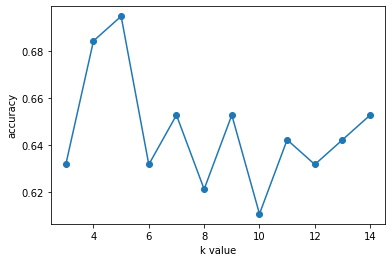

In [21]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [22]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

In [23]:
print("Accuracy is:",accuracy_score(y_test,y_predict))

Accuracy is: 0.6947368421052632


#### Fit the model-3 on traning data, predict on test data and measure the accuracy

In [24]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pre=svm_linear.predict(X_test)

In [25]:
print("Accuracy is:",accuracy_score(y_test,y_pre))

Accuracy is: 0.6947368421052632


### Insight

Accuracy is the highest for Logistic Regression, hence it is the best model out of 3 for this data set.